In [1]:
import requests
import pandas as pd
import re

# Define the API endpoint
url = 'https://api.archives-ouvertes.fr/search/'

# Specify your query parameters
params = {
    'q': 'LEDa Dauphine',  # search term
    'fl': 'docid, label_s, uri_s',  # fields to retrieve
    'start': 0,  # starting record
    'rows': 10000   # number of records to retrieve
}

# Make the GET request
response = requests.get(url, params=params)

# Check if the request was successful and process the data
if response.status_code == 200:
    data = response.json()
    documents = []
    for doc in data['response']['docs']:
        document_data = {
            'docid': doc.get('docid'),
            'label': doc.get('label_s'),
            'url': doc.get('uri_s')
        }
        documents.append(document_data)
    # Create a DataFrame
    df = pd.DataFrame(documents)

else:
    data = f"Failed to retrieve data: {response.status_code}"

df

,docid,label,url
0,1883353,"Lisa Chauvet, Emmanuelle Lavallée, Camille Sai...",https://hal.science/hal-01883353
1,1840241,"Joachim Jarreau, Anda David. Migrating out of ...",https://hal.science/hal-01840241
2,2429528,"David Alary, Franck Bien. Assurance santé et f...",https://hal.science/hal-02429528
3,4389811,"Jean-Pierre Cling, Denis Cogneau, Jacques Loup...",https://hal.science/hal-04389811
4,1935787,"Philippe de Vreyer, Björn Nilsson. When solida...",https://hal.science/hal-01935787
...,...,...,...
1741,2102899,"Hubert Blain, Frédéric Bloch, Liliane Borel, P...",https://inserm.hal.science/inserm-02102899
1742,3141263,"Fabrice Carrat, Mathilde Touvier, Gianluca Sev...",https://hal.sorbonne-universite.fr/hal-03141263
1743,3600604,"Fabrice Carrat, Xavier de Lamballerie, Delphin...",https://hal.science/hal-03600604
1744,2272452,"Isabelle Guérin, François Roubaud, Christophe ...",https://ird.hal.science/ird-02272452


In [3]:
def extract_info(label):
    # Regex pattern for author names and paper titles
    pattern = r'^(.*?)\. {1,2}(.*?)\.\s*(.*?)(\d{4})'
    match = re.match(pattern, label)
    if match:
        # Author names, Paper titles, Year
        return match.group(1), match.group(2), match.group(4)
    else:
        return 'Unknown', 'Unknown', 'Unknown'
    
# Apply the function to each row in the DataFrame
df[['author', 'title', 'year']] = df['label'].apply(lambda x: pd.Series(extract_info(x)))

# Display the DataFrame
df[['author', 'title', 'year']]

,author,title,year
0,"Lisa Chauvet, Emmanuelle Lavallée, Camille Sai...",Third DIAL Conference on Barriers to Development,2018
1,"Joachim Jarreau, Anda David",Migrating out of a crowded labor market: evide...,2017
2,"David Alary, Franck Bien",Assurance santé et franchise,2007
3,"Jean-Pierre Cling, Denis Cogneau, Jacques Loup...",L'égalité des chances: un nouveau défi pour le...,2006
4,"Philippe de Vreyer, Björn Nilsson",When solidarity fails: Heterogeneous effects o...,2019
...,...,...,...
1741,"Hubert Blain, Frédéric Bloch, Liliane Borel, P...",Activité physique et prévention des chutes che...,2015
1742,"Fabrice Carrat, Mathilde Touvier, Gianluca Sev...",Incidence and risk factors of COVID-19-like sy...,2021
1743,"Fabrice Carrat, Xavier de Lamballerie, Delphin...",Antibody status and cumulative incidence of SA...,2021
1744,"Isabelle Guérin, François Roubaud, Christophe Z","Guilmoto, Mireille Razafindrakoto, Marc Pilon,...",2019


In [4]:
pd.set_option('display.max_colwidth', None)
df

,docid,label,url,author,title,year
0,1883353,"Lisa Chauvet, Emmanuelle Lavallée, Camille Saint Macary, Sandrine Mesplé-Somps. Third DIAL Conference on Barriers to Development. The Journal of Development Studies, 2018, &#x27E8;10.1080/00220388.2018.1499896&#x27E9;. &#x27E8;hal-01883353&#x27E9;",https://hal.science/hal-01883353,"Lisa Chauvet, Emmanuelle Lavallée, Camille Saint Macary, Sandrine Mesplé-Somps",Third DIAL Conference on Barriers to Development,2018
1,1840241,"Joachim Jarreau, Anda David. Migrating out of a crowded labor market: evidence from Egypt. IZA Journal of Development and Migration, 2017, 7 (1), &#x27E8;10.1186/s40176-017-0092-4&#x27E9;. &#x27E8;hal-01840241&#x27E9;",https://hal.science/hal-01840241,"Joachim Jarreau, Anda David",Migrating out of a crowded labor market: evidence from Egypt,2017
2,2429528,"David Alary, Franck Bien. Assurance santé et franchise. Risques, 2007, 72. &#x27E8;hal-02429528&#x27E9;",https://hal.science/hal-02429528,"David Alary, Franck Bien",Assurance santé et franchise,2007
3,4389811,"Jean-Pierre Cling, Denis Cogneau, Jacques Loup, Jean-David Naudet, Mireille Razafindrakoto, et al.. L'égalité des chances: un nouveau défi pour le développement ?. L'Économie politique, 2006, 30 (2), pp.21. &#x27E8;10.3917/leco.030.0021&#x27E9;. &#x27E8;hal-04389811&#x27E9;",https://hal.science/hal-04389811,"Jean-Pierre Cling, Denis Cogneau, Jacques Loup, Jean-David Naudet, Mireille Razafindrakoto, et al.",L'égalité des chances: un nouveau défi pour le développement ?,2006
4,1935787,"Philippe de Vreyer, Björn Nilsson. When solidarity fails: Heterogeneous effects on children from adult deaths in Senegalese households. World Development, 2019, 114, &#x27E8;10.1016/j.worlddev.2018.09.018&#x27E9;. &#x27E8;hal-01935787&#x27E9;",https://hal.science/hal-01935787,"Philippe de Vreyer, Björn Nilsson",When solidarity fails: Heterogeneous effects on children from adult deaths in Senegalese households,2019
...,...,...,...,...,...,...
1741,2102899,"Hubert Blain, Frédéric Bloch, Liliane Borel, Patricia Dargent-Molina, Jean Bernard Gauvain, et al.. Activité physique et prévention des chutes chez les personnes âgées. [Rapport de recherche] Institut national de la santé et de la recherche médicale(INSERM). 2015, Paris : Inserm : Éditions EDP Sciences (ISSN : 1264-1782) / 518 p. &#x27E8;inserm-02102899&#x27E9;",https://inserm.hal.science/inserm-02102899,"Hubert Blain, Frédéric Bloch, Liliane Borel, Patricia Dargent-Molina, Jean Bernard Gauvain, et al.",Activité physique et prévention des chutes chez les personnes âgées,2015
1742,3141263,"Fabrice Carrat, Mathilde Touvier, Gianluca Severi, Laurence Meyer, Florence Jusot, et al.. Incidence and risk factors of COVID-19-like symptoms in the French general population during the lockdown period: a multi-cohort study. BMC Infectious Diseases, 2021, 21 (1), &#x27E8;10.1186/s12879-021-05864-8&#x27E9;. &#x27E8;hal-03141263&#x27E9;",https://hal.sorbonne-universite.fr/hal-03141263,"Fabrice Carrat, Mathilde Touvier, Gianluca Severi, Laurence Meyer, Florence Jusot, et al.",Incidence and risk factors of COVID-19-like symptoms in the French general population during the lockdown period: a multi-cohort study,2021
1743,3600604,"Fabrice Carrat, Xavier de Lamballerie, Delphine Rahib, Hélène Blanché, Nathanael Lapidus, et al.. Antibody status and cumulative incidence of SARS-CoV-2 infection among adults in three regions of France following the first lockdown and associated risk factors: a multicohort study. International Journal of Epidemiology, 2021, 50 (5), pp.1458-1472. &#x27E8;10.1093/ije/dyab110&#x27E9;. &#x27E8;hal-03600604&#x27E9;",https://hal.science/hal-03600604,"Fabrice Carrat, Xavier de Lamballerie, Delphine Rahib, Hélène Blanché, Nathanael Lapidus, et al.",Antibody status and cumulative incidence of SARS-CoV-2 infection among adults in three regions of France following the first lockdown and associated risk factors: a multicohort study,2021
1744,2272452,"Isabelle Guérin, François R

In [5]:
df.replace('', pd.NA, inplace=True)
# Count the number of NaN cells in the entire DataFrame
total_blanks = df.isna().sum().sum()
total_blanks

0

In [13]:
import requests
from bs4 import BeautifulSoup
from requests.exceptions import RequestException

def scrape_abstract(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            abstract_div = soup.find('div', {'class': 'abstract-content active', 'lang': 'en'}) \
                          or soup.find('div', {'class': 'abstract-content active', 'lang': 'fr'})
            if abstract_div:
                return abstract_div.text.strip()
        return None
    except RequestException:
        return None

In [14]:
df['abstract'] = df['url'].apply(scrape_abstract)

In [15]:
df.replace('None', pd.NA, inplace=True)
# Count the number of NaN cells in the entire DataFrame
total_blanks = df.isna().sum().sum()
total_blanks

777

In [16]:
df

,docid,label,url,author,title,year,abstract
0,1883353,"Lisa Chauvet, Emmanuelle Lavallée, Camille Saint Macary, Sandrine Mesplé-Somps. Third DIAL Conference on Barriers to Development. The Journal of Development Studies, 2018, &#x27E8;10.1080/00220388.2018.1499896&#x27E9;. &#x27E8;hal-01883353&#x27E9;",https://hal.science/hal-01883353,"Lisa Chauvet, Emmanuelle Lavallée, Camille Saint Macary, Sandrine Mesplé-Somps",Third DIAL Conference on Barriers to Development,2018,None
1,1840241,"Joachim Jarreau, Anda David. Migrating out of a crowded labor market: evidence from Egypt. IZA Journal of Development and Migration, 2017, 7 (1), &#x27E8;10.1186/s40176-017-0092-4&#x27E9;. &#x27E8;hal-01840241&#x27E9;",https://hal.science/hal-01840241,"Joachim Jarreau, Anda David",Migrating out of a crowded labor market: evidence from Egypt,2017,"We analyze the determinants of emigration at the individual and household level, using three waves of the Egyptian labor market panel survey (ELMPS) covering the 1998–2012 period. Exploiting the panel structure of the data allows us to reduce the risk of reverse causality and to estimate the effect of migrant networks more accurately than in studies based on cross-sectional data. We confirm, in the Egyptian context, the non-linear relationship between household resources and migration propensity, due to migration costs; a larger network of past emigrants from the same community mitigates this selection on wealth, increasing the propensity to migrate among poorer households. We also show that unemployment and informal employment act as incentives to emigrate, suggesting that the scarcity of quality jobs, in particular on the skilled labor market, is one important driver of emigration flows in Egypt. However, these incentives turn into effective migration only in communities with a sufficiently large network of past migrants."
2,2429528,"David Alary, Franck Bien. Assurance santé et franchise. Risques, 2007, 72. &#x27E8;hal-02429528&#x27E9;",https://hal.science/hal-02429528,"David Alary, Franck Bien",Assurance santé et franchise,2007,None
3,4389811,"Jean-Pierre Cling, Denis Cogneau, Jacques Loup, Jean-David Naudet, Mireille Razafindrakoto, et al.. L'égalité des chances: un nouveau défi pour le développement ?. L'Économie politique, 2006, 30 (2), pp.21. &#x27E8;10.3917/leco.030.0021&#x27E9;. &#x27E8;hal-04389811&#x27E9;",https://hal.science/hal-04389811,"Jean-Pierre Cling, Denis Cogneau, Jacques Loup, Jean-David Naudet, Mireille Razafindrakoto, et al.",L'égalité des chances: un nouveau défi pour le développement ?,2006,None
4,1935787,"Philippe de Vreyer, Björn Nilsson. When solidarity fails: Heterogeneous effects on children from adult deaths in Senegalese households. World Development, 2019, 114, &#x27E8;10.1016/j.worlddev.2018.09.018&#x27E9;. &#x27E8;hal-01935787&#x27E9;",https://hal.science/hal-01935787,"Philippe de Vreyer, Björn Nilsson",When solidarity fails: Heterogeneous effects on children from adult deaths in Senegalese households,2019,"The consequences of orphanhood have been an important topic on the research agenda in recent years, particularly against the backdrop of the AIDS epidemic in Sub-Saharan Africa. Previous literature has highlighted negative effects on children from prime-age adult deaths in the household. Some authors have however pointed out that the effects are small, possibly as a result of well-functioning coping mechanisms prevailing in the region. Furthermore, previous literature has not focused on the role of household living and budgetary arrangements. In this article, we investigate the links between deaths in the household and subsequent economic outcomes of children. Exploiting an unusually rich dataset from Senegal that permits us to precisely identify the main caregiver of a given child in the household, we test whether impacts on children differ according to their relationship with the deceased. We find robust evidence that this is the case: deaths in the household are not

In [1]:
df.to_csv('dataset.csv', index=False)

NameError: name 'df' is not defined

In [2]:
import pandas as pd

df = pd.read_csv('./dataset.csv', sep=",")
df['author'] = df['author'].str.replace('et al.', '', regex=False)
df

,docid,label,url,author,title,year,abstract,combined_text,language
0,1883353,"Lisa Chauvet, Emmanuelle Lavallée, Camille Sai...",https://hal.science/hal-01883353,"Lisa Chauvet, Emmanuelle Lavallée, Camille Sai...",Third DIAL Conference on Barriers to Development,2018,NaN,Third DIAL Conference on Barriers to Development,en
1,1840241,"Joachim Jarreau, Anda David. Migrating out of ...",https://hal.science/hal-01840241,"Joachim Jarreau, Anda David",Migrating out of a crowded labor market: evide...,2017,We analyze the determinants of emigration at t...,Migrating out of a crowded labor market: evide...,en
2,2429528,"David Alary, Franck Bien. Assurance santé et f...",https://hal.science/hal-02429528,"David Alary, Franck Bien",Assurance santé et franchise,2007,NaN,Assurance santé et franchise,fr
3,4389811,"Jean-Pierre Cling, Denis Cogneau, Jacques Loup...",https://hal.science/hal-04389811,"Jean-Pierre Cling, Denis Cogneau, Jacques Loup...",L'égalité des chances: un nouveau défi pour le...,2006,NaN,L'égalité des chances: un nouveau défi pour le...,fr
4,1935787,"Philippe de Vreyer, Björn Nilsson. When solida...",https://hal.science/hal-01935787,"Philippe de Vreyer, Björn Nilsson",When solidarity fails: Heterogeneous effects o...,2019,The consequences of orphanhood have been an im...,When solidarity fails: Heterogeneous effects o...,en
...,...,...,...,...,...,...,...,...,...
1741,2102899,"Hubert Blain, Frédéric Bloch, Liliane Borel, P...",https://inserm.hal.science/inserm-02102899,"Hubert Blain, Frédéric Bloch, Liliane Borel, P...",Activité physique et prévention des chutes che...,2015,Les chutes chez les personnes âgées sont fréqu...,Activité physique et prévention des chutes che...,fr
1742,3141263,"Fabrice Carrat, Mathilde Touvier, Gianluca Sev...",https://hal.sorbonne-universite.fr/hal-03141263,"Fabrice Carrat, Mathilde Touvier, Gianluca Sev...",Incidence and risk factors of COVID-19-like sy...,2021,Background\r\nOur main objectives were to esti...,Incidence and risk factors of COVID-19-like sy...,en
1743,3600604,"Fabrice Carrat, Xavier de Lamballerie, Delphin...",https://hal.science/hal-03600604,"Fabrice Carrat, Xavier de Lamballerie, Delphin...",Antibody status and cumulative incidence of SA...,2021,Background We aimed to estimate the seropositi...,Antibody status and cumulative incidence of SA...,en
1744,2272452,"Isabelle Guérin, François Roubaud, Christophe ...",https://ird.hal.science/ird-02272452,"Isabelle Guérin, François Roubaud, Christophe Z","Guilmoto, Mireille Razafindrakoto, Marc Pilon,...",2019,"Comment, depuis plusieurs décennies, la recher...","Guilmoto, Mireille Razafindrakoto, Marc Pilon,...",fr


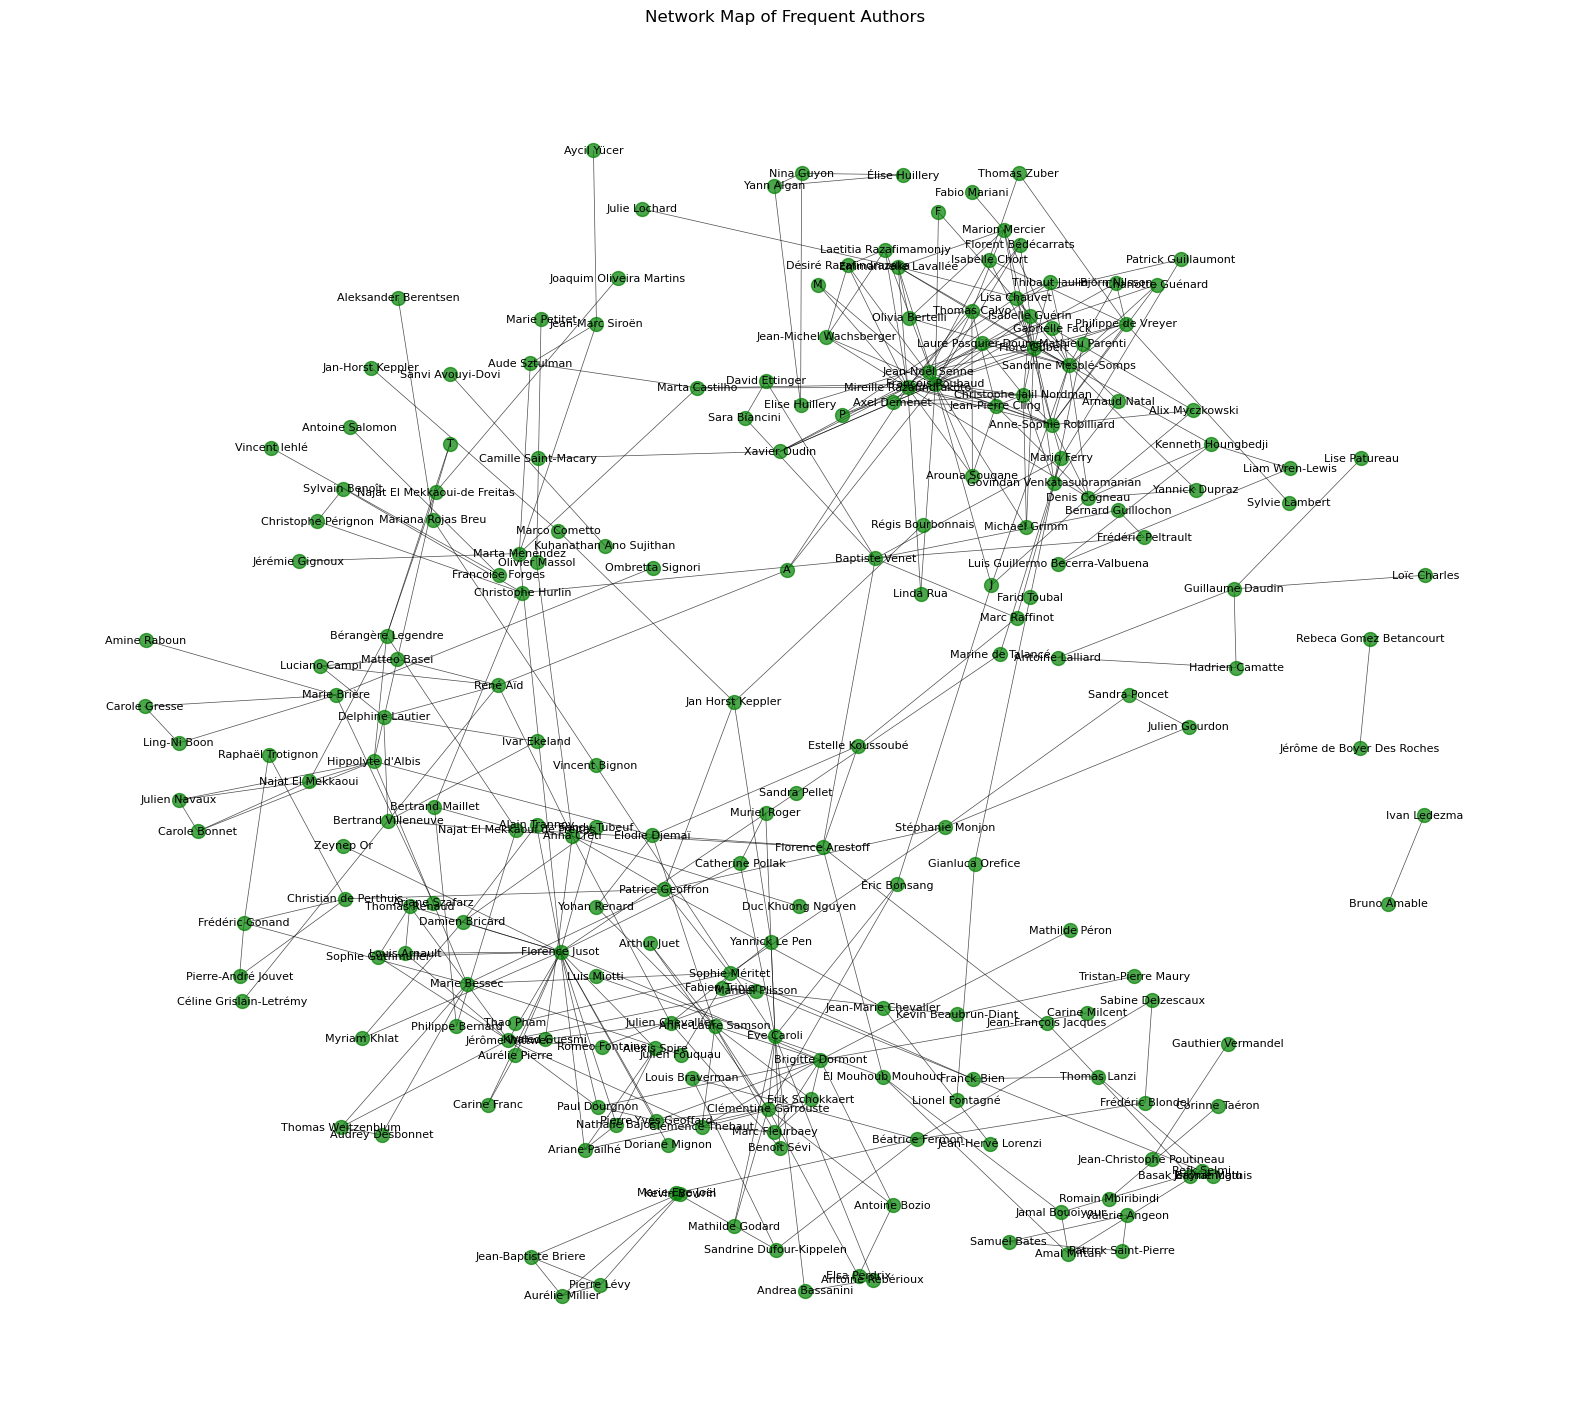

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

from collections import Counter

# Count the frequency of each author in the dataset
author_frequency = Counter()
for _, row in df.iterrows():
    authors = [author.strip() for author in row['author'].split(',')]
    author_frequency.update(authors)

# Authors who appear more than once
threshold = 3

# Creating a network graph with filtered authors
G_filtered = nx.Graph()

# Iterating through the DataFrame to add edges between authors, considering only frequent authors
for _, row in df.iterrows():
    authors = [author.strip() for author in row['author'].split(',')]
    frequent_authors = [author for author in authors if author_frequency[author] > threshold]

    # Adding edges between all pairs of frequent authors in a single paper
    for i in range(len(frequent_authors)):
        for j in range(i + 1, len(frequent_authors)):
            author1 = frequent_authors[i]
            author2 = frequent_authors[j]
            if author1 and author2:
                G_filtered.add_edge(author1, author2)

# Plotting the network of filtered authors
plt.figure(figsize=(20, 18))
pos = nx.spring_layout(G_filtered, k=0.5, iterations=100)  # Adjust layout settings as needed

# Draw nodes and edges
nx.draw_networkx_nodes(G_filtered, pos, node_color='green', node_size=100, alpha=0.7)
nx.draw_networkx_edges(G_filtered, pos, width=0.5, alpha=0.7)

# Draw labels for authors
nx.draw_networkx_labels(G_filtered, pos, font_size=8)

plt.title("Network Map of Frequent Authors")
plt.axis('off')  # Turning off the axis
plt.show()


In [4]:
import numpy as np

degree_dict = dict(G_filtered.degree()) 
degrees = np.array(list(degree_dict.values()))

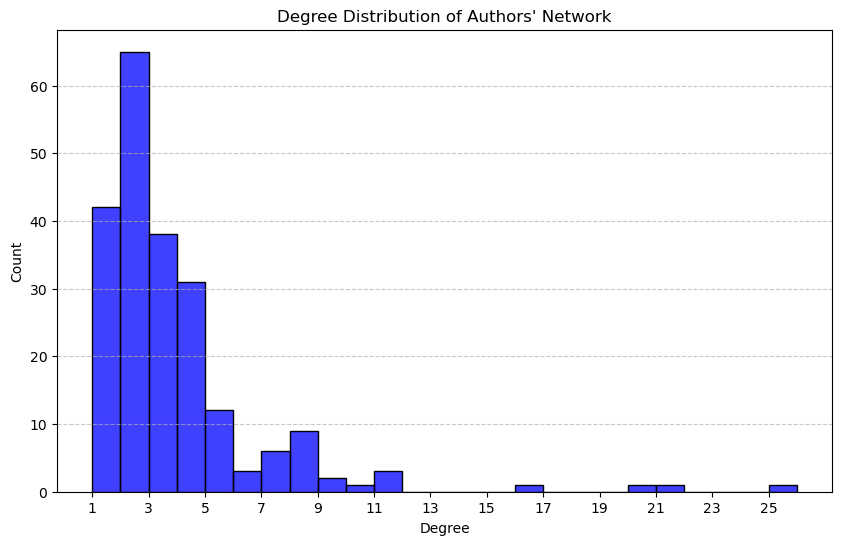

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

degrees_series = pd.Series(degrees)

plt.figure(figsize=(10, 6))
sns.histplot(degrees_series, bins=range(min(degrees_series), max(degrees_series) + 1), kde=False, color='blue')
plt.title("Degree Distribution of Authors' Network")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(min(degrees_series), max(degrees_series) + 1, 2))  # Adjust for readability if necessary
plt.show()


In [6]:
avg_degree = np.mean(degrees)
max_degree = np.max(degrees)
min_degree = np.min(degrees)
print(f"Average Degree: {avg_degree}")
print(f"Maximum Degree: {max_degree}")
print(f"Minimum Degree: {min_degree}")

Average Degree: 3.4537037037037037
Maximum Degree: 26
Minimum Degree: 1


In [7]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming G_combined_filter_corrected is your graph
degree_dict = dict(G_filtered.degree())
author_names = list(degree_dict.keys())
degrees = np.array(list(degree_dict.values())).reshape(-1, 1)

# Clustering (Example with k-means for demonstration)
kmeans = KMeans(n_clusters=5, random_state=0).fit(degrees)
labels = kmeans.labels_

# Visualization
plt.figure(figsize=(165, 55))
for i, label in enumerate(set(labels)):
    cluster_indices = np.where(labels == label)[0]
    cluster_degrees = degrees[cluster_indices].flatten()
    cluster_authors = [author_names[idx] for idx in cluster_indices]
    plt.scatter(cluster_indices, cluster_degrees, label=f'Cluster {i+1}', s=5000)

    for j, txt in enumerate(cluster_authors):
        plt.annotate(txt, (cluster_indices[j], cluster_degrees[j]))
        
plt.title('Authors Clustered by Degree')
plt.xlabel('Author Index')
plt.ylabel('Degree')
plt.legend()
plt.show()



/Users/jeremy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
from langdetect import detect
import pandas as pd

df['combined_text'] = df['title'].fillna('') + ' ' + df['abstract'].fillna('')

def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

df['language'] = df['combined_text'].apply(detect_language)

In [33]:
df_english = df[df['language'] == 'en']
df_french = df[df['language'] == 'fr']

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Combine English and French stopwords
english_stopwords = stopwords.words('english')
french_stopwords = stopwords.words('french')
combined_stopwords = english_stopwords + french_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeremy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
def perform_lda(dataframe, stop_words):
    # Text Preprocessing and Feature Extraction with custom stopwords
    vectorizer = CountVectorizer(max_df=0.9, min_df=3, stop_words=combined_stopwords)
    dtm = vectorizer.fit_transform(dataframe['combined_text'])
    
    # Topic Modeling with LDA
    lda = LatentDirichletAllocation(n_components=5, random_state=0)
    lda.fit(dtm)
    
    return lda, vectorizer, dtm

# Apply LDA to English dataset with combined English and French stopwords
lda_en, vectorizer_en, dtm_en = perform_lda(df_english, english_stopwords)

# Apply LDA to French dataset with just French stopwords
lda_fr, vectorizer_fr, dtm_fr = perform_lda(df_french, french_stopwords)

In [54]:
# Function to display the top words in each topic
def display_lda_topics(lda_model, vectorizer, n_top_words=10):
    words = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        print(f"Topic {topic_idx + 1}:")
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [words[i] for i in top_features_ind]
        print(" ".join(top_features))

# Display topics for English dataset
print("English Topics:")
display_lda_topics(lda_en, vectorizer_en)

# Display topics for French dataset
print("\nFrench Topics:")
display_lda_topics(lda_fr, vectorizer_fr)

English Topics:
Topic 1:
trade informal care formal results french economic cost sector using
Topic 2:
tax aid model debt show firms market paper countries growth
Topic 3:
risk price model equilibrium data market show impact france french
Topic 4:
health social data household survey inequality migration countries income results
Topic 5:
market costs financial countries energy cost data new trade price

French Topics:
Topic 1:
travail marché entre plus assurance personnes france économique publics pratiques
Topic 2:
santé soins énergétique non cette complémentaire plus émissions effet recours
Topic 3:
prix mondialisation sociale plus cette crise pays mondiale accord politique
Topic 4:
plus risque pays impact entre emploi médecins analyse crise être
Topic 5:
plus développement pays économique politiques cette vie comment ans cours


In [37]:
def perform_lda(dataframe, stop_words):
    # Dynamic adjustment based on the size of the dataset
    min_df = 1  # Ensures inclusion even in small datasets
    max_df = 0.95 if len(dataframe) > 100 else 1.0  # Adjust max_df based on dataset size
    
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=combined_stopwords)
    dtm = vectorizer.fit_transform(dataframe['combined_text'])
    lda = LatentDirichletAllocation(n_components=5, random_state=0)
    lda.fit(dtm)
    
    return lda, vectorizer, dtm

In [38]:
def display_lda_topics(lda_model, vectorizer, n_top_words=10):
    words = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [(words[i], topic[i]) for i in top_features_ind]
        topic_str = ", ".join([f"{word} ({weight:.2f})" for word, weight in top_features])
        print(f"Topic {topic_idx + 1}: {topic_str}")

In [39]:
unique_years = sorted(df['year'].unique())

with open('topic_modeling_output.txt', 'w') as f:
    for year in unique_years:
        f.write(f"\nYear: {year}\n")
        df_year = df[df['year'] == year]

        if df_year.empty:
            f.write("No data available for this year.\n")
            continue

        try:
            lda_year, vectorizer_year, _ = perform_lda(df_year, combined_stopwords)
            words = vectorizer_year.get_feature_names_out()
            for topic_idx, topic in enumerate(lda_year.components_):
                top_features_ind = topic.argsort()[:-10 - 1:-1]
                top_features = [(words[i], topic[i]) for i in top_features_ind]
                topic_str = ", ".join([f"{word} ({weight:.2f})" for word, weight in top_features])
                f.write(f"Topic {topic_idx + 1}: {topic_str}\n")
        except ValueError as e:
            f.write("An error occurred: " + str(e) + "\n")